In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import easyocr
import imutils

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
c:\ProgramData\anaconda3\Lib\site-packages\transformers\utils\generic.py:482: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


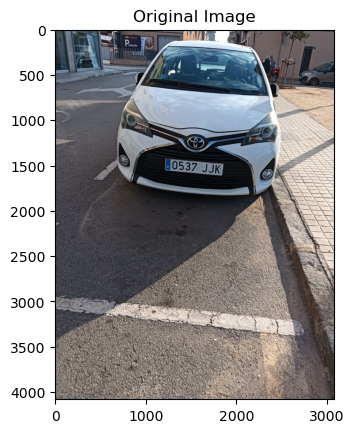

In [3]:
img = cv2.imread("Cars/Dataset Cars/Train/0537JJK.jpg") #read image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

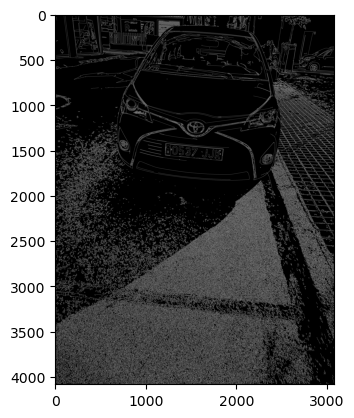

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert image to gray
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [5]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #Find contours
contours = imutils.grab_contours(keypoints) #Grab contours
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10] #Sort contours

#Loop over our contours to find the best possible approximate contour of 10 contours
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

print("Location: ", location)

Location:  [[[1215 1433]]

 [[1218 1558]]

 [[1841 1611]]

 [[1849 1484]]]


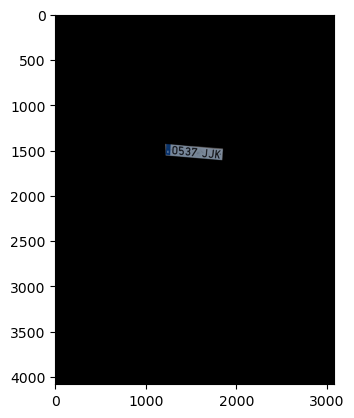

In [6]:
mask = np.zeros(gray.shape, np.uint8) #create blank image with same dimensions as the original image
new_image = cv2.drawContours(mask, [location], 0,255, -1) #Draw contours on the mask image
new_image = cv2.bitwise_and(img, img, mask=mask) #Take bitwise AND between the original image and mask image

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)) #show the final image

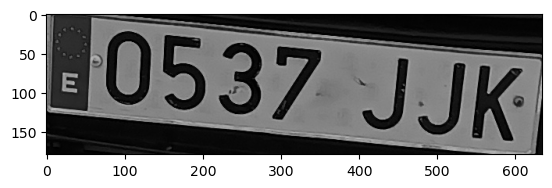

In [7]:
(x,y) = np.where(mask==255) #Find the co-ordinates of the four corners of the document
(x1, y1) = (np.min(x), np.min(y)) #Find the top left corner
(x2, y2) = (np.max(x), np.max(y)) #Find the bottom right corner
cropped_image = gray[x1:x2+1, y1:y2+1] #Crop the image using the co-ordinates

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)) #show the cropped image

In [8]:
reader = easyocr.Reader(['es']) #create an easyocr reader object with english as the language
result = reader.readtext(cropped_image) #read text from the cropped image
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[18, 72], [46, 72], [46, 106], [18, 106]], 'E', 0.9978412132319967),
 ([[55, 1], [634, 1], [634, 179], [55, 179]], '0537 JJK', 0.6546454068479058)]

LICENSE PLATE: ['E', '0537 JJK']


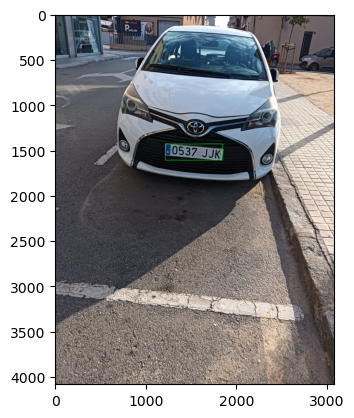

In [10]:
text = [i[-2] for i in result] #Extract the text from the result
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3) #Draw a rectangle around the plate
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB)) #show the final image with text
print('LICENSE PLATE:',text)